# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I encourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [5]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [6]:
df['_STATE'].value_counts()

36.0    12249
34.0    11708
9.0     10588
Name: _STATE, dtype: int64

In [7]:
pd.set_option('display.max_columns', 360)


In [8]:
# your code here
df = df[df['_STATE'].isin([9,34,36])]

Now check to see how large our subset df.

In [9]:
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [10]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [11]:
print(df['PHYSHLTH'].value_counts())
print(df['PHYSHLTH'].isna().sum())



88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64
0


In [12]:
#your code here
df['PHYSHLTH'] = df['PHYSHLTH'].replace([88],0)
df['PHYSHLTH'].value_counts()


0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [13]:
df['PHYSHLTH'] = df['PHYSHLTH'].replace([77],None)
df['PHYSHLTH'] = df['PHYSHLTH'].replace([99],None)
df.dropna(axis=0,subset=['PHYSHLTH'], inplace=True)
df['PHYSHLTH'].value_counts()


0.0     21801
30.0     2498
2.0      2056
1.0      1561
3.0      1220
5.0      1115
10.0      766
7.0       658
15.0      658
4.0       637
20.0      410
14.0      330
6.0       193
25.0      162
8.0       102
21.0       70
12.0       69
28.0       59
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [14]:
# descriptive statistics
df['PHYSHLTH'].describe()


count    34545.000000
mean         4.082704
std          8.511923
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

Text(0, 0.5, 'Days Sick')

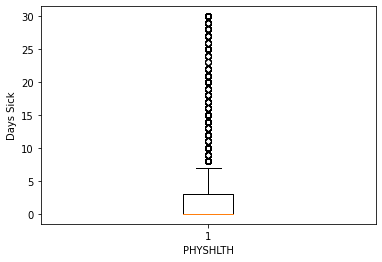

In [15]:
#generate a graph that quickly shows those statistics
import matplotlib.pyplot as plt
from pylab import *
fig = plt.figure()

ax = fig.add_subplot(111)
ax.boxplot(df['PHYSHLTH'])
ax.set_xlabel('PHYSHLTH')
ax.set_ylabel('Days Sick')



In [16]:
df['PHYSHLTH'].index

Int64Index([ 49938,  49939,  49940,  49941,  49942,  49943,  49944,  49945,
             49946,  49947,
            ...
            303769, 303770, 303771, 303772, 303773, 303774, 303775, 303776,
            303777, 303778],
           dtype='int64', length=34545)

Text(0, 0.5, '# of Observations')

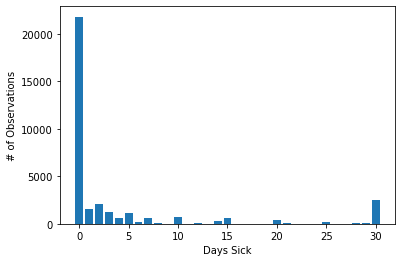

In [17]:
fig, ax = plt.subplots()
x = df['PHYSHLTH'].value_counts().index
y = df['PHYSHLTH'].value_counts().values
plt.bar(x,y)
ax.set_xlabel('Days Sick')
ax.set_ylabel('# of Observations')


Text(0, 0.5, '# of Observations')

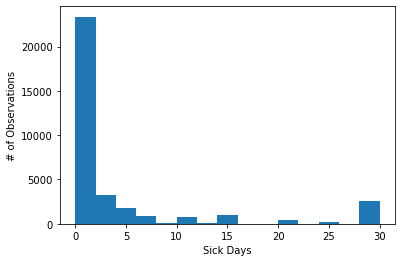

In [18]:
fig, ax = plt.subplots()
x = df['PHYSHLTH']
plt.hist(x,bins=15)
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of Observations')

In [19]:
# graph the distribution of data


## 3. Generate a graphic that compares the average number of sick days for each state. 

In [20]:
# code to calculate the average number of sick days by state

df.groupby(['_STATE'])['PHYSHLTH'].mean()

_STATE
9.0     3.696732
34.0    4.366502
36.0    4.145073
Name: PHYSHLTH, dtype: float64

Text(0, 0.5, 'Days Sick')

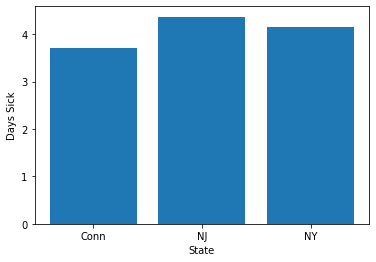

In [21]:
fig, ax = plt.subplots()
x = ['Conn', 'NJ', 'NY']
y = df.groupby(['_STATE'])['PHYSHLTH'].mean().values
plt.bar(x,y)
ax.set_xlabel('State')
ax.set_ylabel('Days Sick')

In [22]:
# code to graph those averages using matplotlib


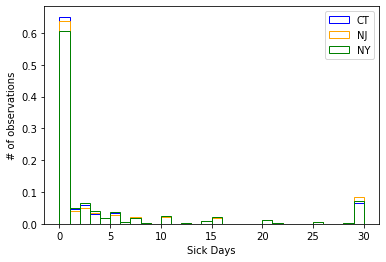

In [26]:
ct = df.where(df['_STATE']==9)
nj = df.where(df['_STATE']==34)
ny = df.where(df['_STATE']==36)
fig, ax = plt.subplots()
plt.hist(ct['PHYSHLTH'], bins=30, label = 'CT', edgecolor = 'blue', density = True, facecolor = 'None')
plt.hist(nj['PHYSHLTH'], bins = 30, label = 'NJ', edgecolor = 'orange', density = True, facecolor = 'None')
plt.hist(ny['PHYSHLTH'], bins =30, label = 'NY', edgecolor = 'green', density = True, facecolor = 'None')
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.legend(loc ='best')

In [ ]:
# graphic showing the histogram of data



## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [21]:
# code to create new colum for chronically sick

df['Chronic'] = np.where(df['PHYSHLTH']>10, 1, 0)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,Chronic
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [22]:
df.groupby(['_STATE'])['Chronic'].mean()

_STATE
9.0     0.114847
34.0    0.138709
36.0    0.129072
Name: Chronic, dtype: float64

Text(0, 0.5, '% Chronically Ill')

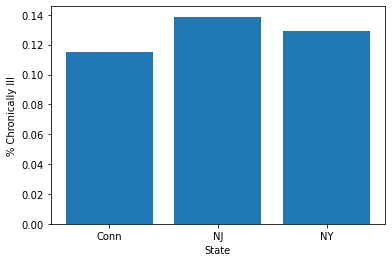

In [23]:
fig, ax = plt.subplots()
x = ['Conn', 'NJ', 'NY']
y = df.groupby(['_STATE'])['Chronic'].mean().values
plt.bar(x,y)
ax.set_xlabel('State')
ax.set_ylabel('% Chronically Ill')

In [24]:
# create graphic to compare chronically sick by state


## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [25]:
df.dropna(axis=0,subset=['SMOKDAY2'], inplace=True)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,Chronic
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,1.0,1.0,0.0,88.0,NaN,1.0,1.0,2.0,1.0,3.0,NaN,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,5.0,1.0,NaN,NaN,NaN,2.0,1.0,88.0,8.0,1.0,164.0,504.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,NaN,7.0,3.0,2.0,NaN,101.0,1.0,88.0,2.0,103.0,555.0,327.0,555.0,302.0,102.0,1.0,64.0,105.0,30.0,67.0,103.0,14.0,104.0,1.0,1.0,102016.0,2.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [26]:
# your code here




In [27]:
df['SMOKDAY2'].describe()

count    13783.000000
mean         2.525720
std          0.853626
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: SMOKDAY2, dtype: float64

In [28]:
df['SMOKDAY2'].value_counts()

3.0    9703
1.0    2676
2.0    1371
9.0      27
7.0       6
Name: SMOKDAY2, dtype: int64

In [27]:
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])
df['smoking'] = np.where(df['SMOKE100']==7, 7, df['smoking'])
df['smoking'] = np.where(df['SMOKE100']==9, 9, df['smoking'])
df['smoking'].value_counts()

3.0    28790
1.0     2676
2.0     1371
7.0      180
9.0       78
Name: smoking, dtype: int64

In [28]:
df['smoking'].describe()

count    33095.000000
mean         2.832754
std          0.713282
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: smoking, dtype: float64

In [29]:
smoking_avg = df['smoking'].value_counts()/df['smoking'].count()
smoking_avg

3.0    0.869920
1.0    0.080858
2.0    0.041426
7.0    0.005439
9.0    0.002357
Name: smoking, dtype: float64

In [30]:
smoking_avg.index

Float64Index([3.0, 1.0, 2.0, 7.0, 9.0], dtype='float64')

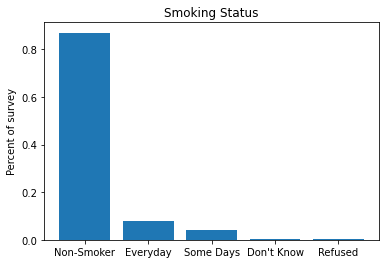

In [31]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avg)

# Set title and lables
# ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')

plt.show()

Text(0, 0.5, '# of observations')

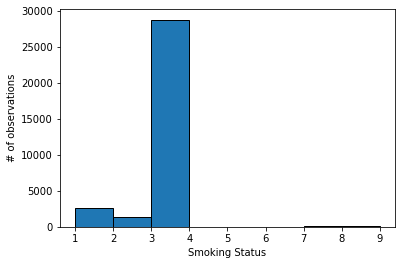

In [36]:
#histogram:

fig, ax = plt.subplots()
plt.hist(df['smoking'], bins=8, edgecolor='black')
ax.set_xlabel('Smoking Status')
ax.set_ylabel('# of observations')


In [30]:
# code to graph those proportions of different smoking groups using matplotlib


In [40]:
df['_STATE'] = df['_STATE'].replace([36],'NY')
df['_STATE'] = df['_STATE'].replace([34],'NJ')
df['_STATE'] = df['_STATE'].replace([9],'CT')

df['_STATE']

49938     CT
49939     CT
49940     CT
49941     CT
49942     CT
          ..
303774    NY
303775    NY
303776    NY
303777    NY
303778    NY
Name: _STATE, Length: 34545, dtype: object

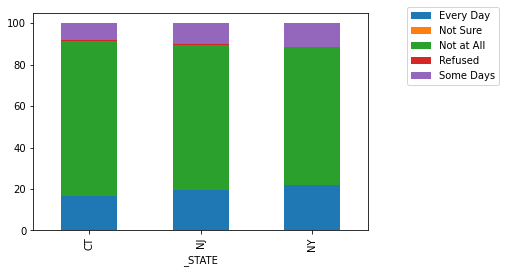

In [54]:
df.SMOKDAY2.replace([1,2,3,7,9],['Every Day','Some Days','Not at All','Not Sure','Refused'],inplace=True)

x = df.groupby('_STATE')['SMOKDAY2'].value_counts(normalize=True).unstack() * 100
fig,ax = plt.subplots()
x.plot.bar(stacked=True,ax=ax,)
ax.legend(bbox_to_anchor=(1.1, 1.05))

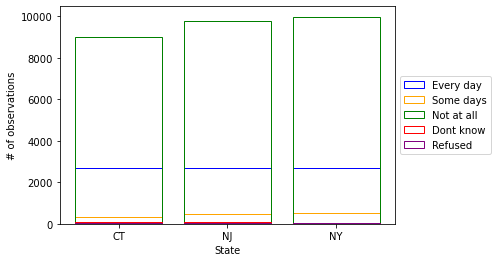

In [50]:
every = df.where(df['smoking']==1)
every = every.groupby(every['smoking']).count()
some = df.where(df['smoking']==2)
some = some.groupby(some['_STATE']).count()
none = df.where(df['smoking']==3)
none = none.groupby(none['_STATE']).count()
dontknow = df.where(df['smoking']==7)
dontknow = dontknow.groupby(dontknow['_STATE']).count()
refused = df.where(df['smoking']==9)
refused = refused.groupby(refused['_STATE']).count()
x = ['CT','NJ','NY']
fig, ax = plt.subplots()
plt.bar(x, every['smoking'], label = 'Every day', edgecolor = 'blue', facecolor='None')
plt.bar(x, some['smoking'], label = 'Some days', edgecolor = 'orange', facecolor='None')
plt.bar(x, none['smoking'], label = 'Not at all', edgecolor = 'green', facecolor='None')
plt.bar(x, dontknow['smoking'], label = 'Dont know', edgecolor = 'red', facecolor='None')
plt.bar(x, refused['smoking'], label = 'Refused', edgecolor = 'purple', facecolor='None')
ax.set_xlabel('State')
ax.set_ylabel('# of observations')
# ax.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [51]:
# #isn't working:
# every = df.where(df['SMOKDAY2']==1)
# every = every['_STATE'].value_counts(normalize=True)

# some = df.where(df['SMOKDAY2']==2)
# some = some['_STATE'].value_counts(normalize=True)

# none = df.where(df['SMOKDAY2']==3)
# none = none['_STATE'].value_counts(normalize=True)

# dontknow = df.where(df['SMOKDAY2']==7)
# dontknow = dontknow['_STATE'].value_counts(normalize=True)

# refused = df.where(df['SMOKDAY2']==9)
# refused = refused['_STATE'].value_counts(normalize=True)


# fig, ax = plt.subplots()
# plt.bar(every.index, every, label = 'Every day', edgecolor = 'blue', facecolor='None')
# plt.bar(some.index, some, label = 'Some days', edgecolor = 'orange', facecolor='None')
# plt.bar(none.index, none, label = 'Not at all', edgecolor = 'green', facecolor='None')
# plt.bar(dontknow.index, dontknow, label = 'Dont know', edgecolor = 'red', facecolor='None')
# plt.bar(refused.index, refused, label = 'Refused', edgecolor = 'purple', facecolor='None')

# ax.set_xlabel('State')
# ax.set_ylabel('% of observations')
# # ax.legend(loc = 'best')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



In [35]:
#graph showing the breakdown of smokers per state


In [56]:
cat_avg = df.groupby('smoking')['PHYSHLTH'].mean()
cat_std = df.groupby('smoking')['PHYSHLTH'].std()
cat_avg

smoking
1.0    6.566517
2.0    6.246535
3.0    3.771379
7.0    3.761111
9.0    4.858974
Name: PHYSHLTH, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

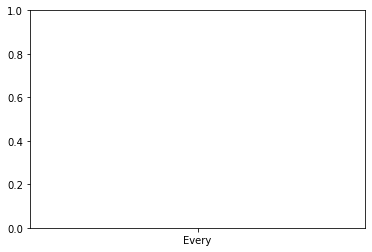

In [58]:
# code to graph these average sick days for each category of smoking status

# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Every', 'Non', 'Some',"unkonwn"], cat_avg)

# Set title and lables
# ax.set_xticklabels(['Everyday', 'Non-Smoker',  'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Days Sick")
ax.set_title('Days Sick by Smoking Status')

plt.show()

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [39]:
# code here to clean up the ALCDAY5 responses
df['ALCDAY5'] = df['ALCDAY5'].replace([101],1*4.3)
df['ALCDAY5'] = df['ALCDAY5'].replace([102],2*4.3)
df['ALCDAY5'] = df['ALCDAY5'].replace([103],3*4.3)
df['ALCDAY5'] = df['ALCDAY5'].replace([104],4*4.3)
df['ALCDAY5'] = df['ALCDAY5'].replace([105],5*4.3)
df['ALCDAY5'] = df['ALCDAY5'].replace([106],6*4.3)
df['ALCDAY5'] = df['ALCDAY5'].replace([107],7*4.3)

for num in range(199,231):
    df['ALCDAY5'] = df['ALCDAY5'].replace([num],num-200)

    
df['ALCDAY5']




49942       4.3
49944      30.0
49946     888.0
49951     888.0
49954       2.0
          ...  
303768      1.0
303769      8.6
303773      8.0
303774      3.0
303776      4.0
Name: ALCDAY5, Length: 13783, dtype: float64

In [40]:
df['ALCDAY5'] = df['ALCDAY5'].replace([777],None)
df['ALCDAY5'] = df['ALCDAY5'].replace([888],None)
df['ALCDAY5'] = df['ALCDAY5'].replace([999],None)

df.dropna(axis=0,subset=['ALCDAY5'], inplace=True)


In [41]:
df['ALCDAY5']

49942      4.3
49944     30.0
49946     30.0
49951     30.0
49954      2.0
          ... 
303768     1.0
303769     8.6
303773     8.0
303774     3.0
303776     4.0
Name: ALCDAY5, Length: 13488, dtype: float64

In [42]:
df['ALCDAY5'].describe()

count    13488.000000
mean        10.447324
std         10.082171
min          1.000000
25%          2.000000
50%          5.000000
75%         16.000000
max         30.100000
Name: ALCDAY5, dtype: float64

In [43]:
#descriptive statistics of cleaned data


Text(0, 0.5, '# of observations')

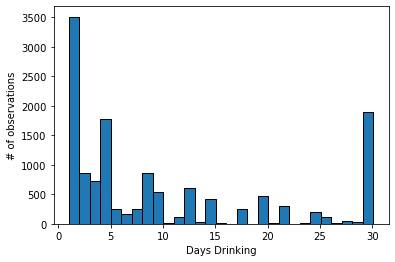

In [44]:
fig, ax = plt.subplots()
plt.hist(df['ALCDAY5'], bins=29, edgecolor='black')
ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')

In [45]:
# graphic showing the histogram of data


In [46]:
# code to calculate averages per state
df.groupby(df['_STATE'])['ALCDAY5'].mean()


_STATE
CT    11.104279
NJ     9.911002
NY    10.395014
Name: ALCDAY5, dtype: float64

In [51]:
# Code to calculate correlation of between number of drinks of number of days physically ill
df[['PHYSHLTH', 'ALCDAY5']].corr()['PHYSHLTH']



PHYSHLTH    1.000000
ALCDAY5    -0.017449
Name: PHYSHLTH, dtype: float64

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

-  Create a 95% confidence interval for the true proportion of chronically sick people.

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.